In [79]:
#This is for the precision 
TP = 114
FP = 14
# FN (0) and TN (12) are not needed in the formuala!
precision = TP / (TP + FP)
print(f"precision: {precision:0.3f}")

precision: 0.891


In [80]:
TP = 114
FN = 0
# FT (14) and TN (12) are not needed in the formuala!
recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

recall: 1.00


In [45]:
#REPRESENTATION AND VISUALIZATION OF DATA

In [81]:
#loading the iris data with scikit learn
from sklearn.datasets import load_iris
iris = load_iris()

In [104]:
type(iris)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [106]:
print(iris["target_names"])
print(iris.target_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [107]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


In [108]:
# The information about samples of each classe which is stored in the "target"
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [109]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [110]:
import numpy as np

#this function shows the evenly distribution of the samples in each class  
np.bincount(iris.target)

array([50, 50, 50])

In [111]:
#The classes' name are store in 'target_names' 
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [112]:
#VISUALISING THE FEATURES OF THE IRIS DATA SET

/tmp/ipykernel_6518/3145448632.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables) --> A zip object yielding tuples until an input is exhausted.
 |  
 |     >>> list(zip('abcdefg', range(3), range(4)))
 |     [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]
 |  
 |  The zip object yields n-length tuples, where n is the number of iterables
 |  passed as positional arguments to zip().  The i-th element in every tuple
 |  comes from the i-th iterable argument to zip().  This continues until the
 |  shortest argument is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and ret

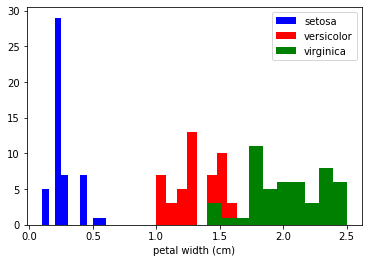

In [113]:
# one dimension histogramme of the petal width
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index],
        label=iris.target_names[label],
        color=color)
    
ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()
help(zip)

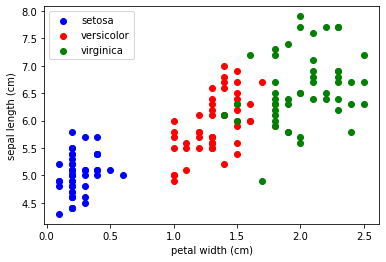

In [114]:
# two dimension scatterplot of the petal width and sepal length
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
        ax.scatter(iris.data[iris.target==label, x_index],
            iris.data[iris.target==label, y_index],
            label=iris.target_names[label],
            c=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

In [115]:
## two dimension scatterplot of the petal width and sepal length

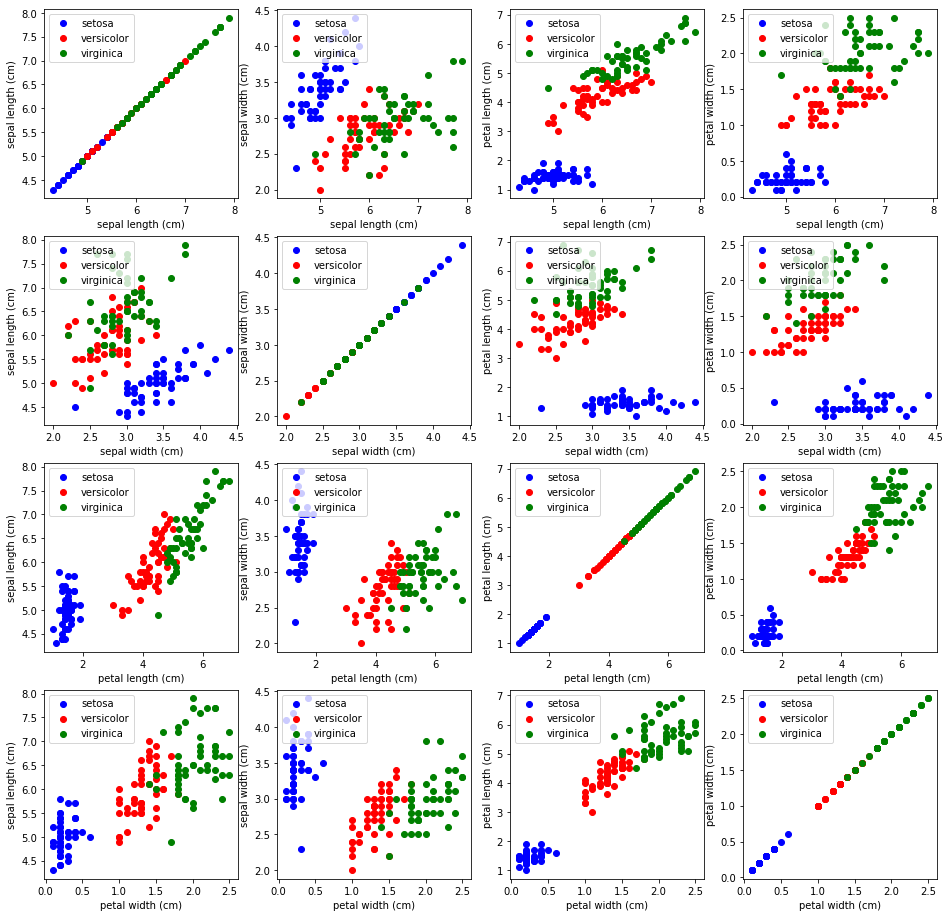

In [116]:
# All  features combination  in a combined diagram
import matplotlib.pyplot as plt

n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind,x],iris.data[iris.target==color_ind, y],
            label=iris.target_names[color_ind],
            c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')
plt.show()

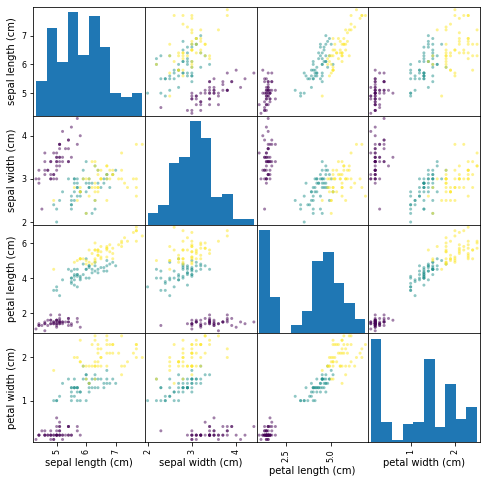

In [117]:
#features combination using a scatterplot matrices
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,c=iris.target,figsize=(8, 8));

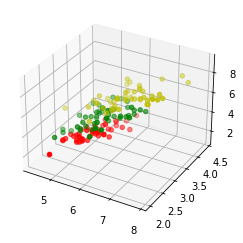

In [118]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
iris = load_iris()
X = []

for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            X[iclass][0].append(iris.data[i][0])
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:]))

colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [119]:
# loading digits DATA

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()

In [121]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [122]:
#number of items and features of digits
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [123]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [124]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


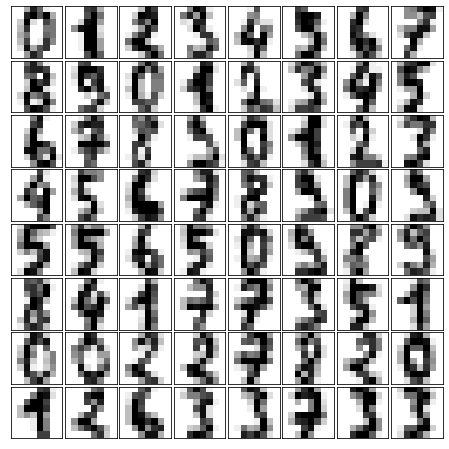

In [125]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05
                   )
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
# label the image with the target value

In [126]:
#SOLUTION TO EXERCISE 1

In [127]:
from sklearn import datasets
wine = datasets.load_wine()

In [128]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [129]:
print(wine.target_names)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [130]:
data = wine.data
labelled_data = wine.target

In [131]:
from sklearn import datasets
import matplotlib.pyplot as plt

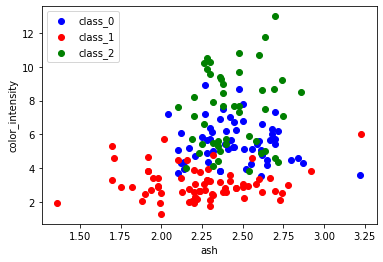

In [132]:
wine = datasets.load_wine()

features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]), wine.feature_names.index(features[1])]

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]],
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],c=color)
    
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show()

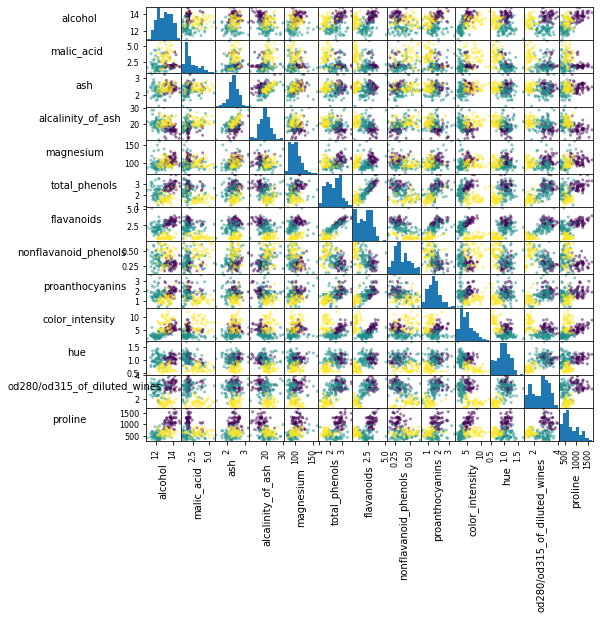

In [133]:
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
def rotate_labels(df, axes):
    """ changing the rotation of the label output, y labels horizontal and x labels vertical """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50
            
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df,
                                 c=wine.target,
                                 figsize=(8, 8),
                                );
rotate_labels(wine_df, axs)

In [134]:
from sklearn.datasets import fetch_olivetti_faces

In [135]:
# fetch the faces data
faces = fetch_olivetti_faces()

In [136]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [137]:
n_samples, n_features = faces.data.shape
print((n_samples, n_features))

(400, 4096)


In [138]:
np.sqrt(4096)

64.0

In [139]:
faces.images.shape

(400, 64, 64)

In [140]:
faces.data.shape

(400, 4096)

In [141]:
print(np.all(faces.images.reshape((400, 4096)) == faces.data))

True


Text(0, 7, '6')

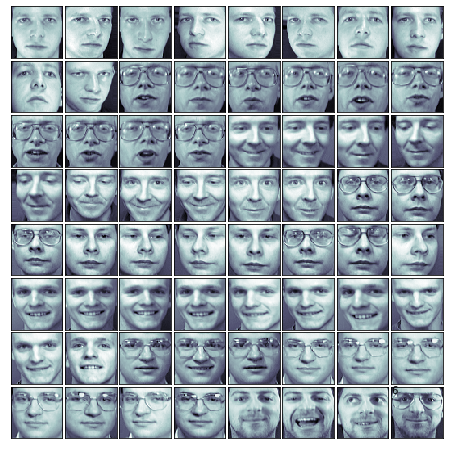

In [142]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
# label the image with the target value
ax.text(0, 7, str(faces.target[i]))